## Import Libraries

In [265]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Reading dataset

In [266]:
data = pd.read_json("stackoverflow-data-idf.json",lines=True)

## Data consist of 20000 rows and 19 columns

In [267]:
data.head()

,id,title,body,answer_count,comment_count,creation_date,last_activity_date,last_editor_display_name,owner_display_name,owner_user_id,post_type_id,score,tags,view_count,accepted_answer_id,favorite_count,last_edit_date,last_editor_user_id,community_owned_date
0,4821394,Serializing a private struct - Can it be done?,<p>I have a public class that contains a priva...,1,0,2011-01-27 20:19:13.563 UTC,2011-01-27 20:21:37.59 UTC,,,163534.0,1,0,c#|serialization|xml-serialization,296,NaN,NaN,NaN,NaN,NaN
1,3367882,How do I prevent floated-right content from ov...,<p>I have the following HTML:</p>\n\n<pre><cod...,2,2,2010-07-30 00:01:50.9 UTC,2012-05-10 14:16:05.143 UTC,,,1190.0,1,2,css|overflow|css-float|crop,4121,3367943.0,0.0,2012-05-10 14:16:05.143 UTC,44390.0,NaN
2,31682135,Gradle command line,<p>I'm trying to run a shell script with gradl...,0,2,2015-07-28 16:30:18.28 UTC,2015-07-28 16:32:15.117 UTC,,,1299158.0,1,1,bash|shell|android-studio|gradle,259,NaN,NaN,NaN,NaN,NaN
3,20218536,Loop variable as parameter in asynchronous fun...,<p>I have an object with the following form.</...,1,1,2013-11-26 13:34:49.957 UTC,2013-11-26 15:07:50.8 UTC,,,642751.0,1,0,javascript|asynchronous|foreach|async.js,120,NaN,1.0,2013-11-26 15:02:47.993 UTC,1333873.0,NaN
4,19941459,Canot get the href value,<p>Hi I need to valid the href is empty or not...,5,1,2013-11-12 22:41:36.11 UTC,2013-11-12 23:48:34.67 UTC,,,819774.0,1,0,javascript,97,19941620.0,NaN,2013-11-12 22:43:42.97 UTC,21886.0,NaN


## Removing  unimportant columns
### 1. Names are not useful for our analysis
### 2. Since we are using creation and edit date we do not need any other date
### 3. Only answer and comment count are useful for our analysis, hence we dropping other count columns

In [268]:
data = data.drop(columns=['body','title','last_editor_display_name','owner_display_name','score','last_editor_user_id','community_owned_date','favorite_count','post_type_id','last_activity_date'])

## If creation date is less than 2015 and post view count is less than 50 then the post is obsolete 
## If creation date is more than 2015 and post view count is greater than 50 then post is new

#### Understanding the datatype of creation date which is string 

In [269]:
data.dtypes

id                      int64
answer_count            int64
comment_count           int64
creation_date          object
owner_user_id         float64
tags                   object
view_count              int64
accepted_answer_id    float64
last_edit_date         object
dtype: object

#### Converting string to datetime

In [270]:
data['creation_date'] = pd.to_datetime(data['creation_date'])

In [271]:
data.dtypes

id                                  int64
answer_count                        int64
comment_count                       int64
creation_date         datetime64[ns, UTC]
owner_user_id                     float64
tags                               object
view_count                          int64
accepted_answer_id                float64
last_edit_date                     object
dtype: object

#### Extracting year from creation date 

In [272]:
data['Year'] = data['creation_date'].dt.year

In [273]:
data

,id,answer_count,comment_count,creation_date,owner_user_id,tags,view_count,accepted_answer_id,last_edit_date,Year
0,4821394,1,0,2011-01-27 20:19:13.563000+00:00,163534.0,c#|serialization|xml-serialization,296,NaN,NaN,2011
1,3367882,2,2,2010-07-30 00:01:50.900000+00:00,1190.0,css|overflow|css-float|crop,4121,3367943.0,2012-05-10 14:16:05.143 UTC,2010
2,31682135,0,2,2015-07-28 16:30:18.280000+00:00,1299158.0,bash|shell|android-studio|gradle,259,NaN,NaN,2015
3,20218536,1,1,2013-11-26 13:34:49.957000+00:00,642751.0,javascript|asynchronous|foreach|async.js,120,NaN,2013-11-26 15:02:47.993 UTC,2013
4,19941459,5,1,2013-11-12 22:41:36.110000+00:00,819774.0,javascript,97,19941620.0,2013-11-12 22:43:42.97 UTC,2013
...,...,...,...,...,...,...,...,...,...,...
19995,45643057,0,1,2017-08-11 20:10:22.387000+00:00,8450318.0,c#|winforms|cmd|telnet,28,NaN,2017-08-11 22:00:08.853 UTC,2017
19996,18079413,0,0,2013-08-06 11:51:37.463000+00:00,1939409.0,android|ios|ipad|xamarin.ios|xamarin.android,80,NaN,NaN,2013
19997,39977022,0,0,2016-10-11 12:14:43.260000+00:00,4102561.0,typescript|atom-editor,18,NaN,2017-01-18 18:41:16.67 UTC,2016
19998,33328431,3,3,2015-10-25 10:03:00.587000+00:00,4195815.0,angularjs,164,NaN,NaN,2015


#### 0 - new
#### 1 - obsolete

In [274]:
new_old = []
for index,row in data.iterrows():
    if (row[9] > 2015) and (row[6] > 50):
        new_old.append(0)
    else:
        new_old.append(1)

#### Addding new column post type (0 - new snd 1 - absolete)

In [275]:
data['POST_TYPE'] = new_old

In [276]:
data.POST_TYPE.value_counts()

1    16082
0     3918
Name: POST_TYPE, dtype: int64

## Finding correlation of other columns with Post type

In [277]:
data.corr()

,id,answer_count,comment_count,owner_user_id,view_count,accepted_answer_id,Year,POST_TYPE
id,1.000000,-0.287694,0.095611,0.707181,-0.142146,0.997468,0.983921,-0.546873
answer_count,-0.287694,1.000000,0.064875,-0.192529,0.346643,-0.225833,-0.305125,0.081816
comment_count,0.095611,0.064875,1.000000,0.093141,0.012623,0.097289,0.102040,-0.065409
owner_user_id,0.707181,-0.192529,0.093141,1.000000,-0.102576,0.711468,0.691075,-0.374763
view_count,-0.142146,0.346643,0.012623,-0.102576,1.000000,-0.139075,-0.151212,0.058164
accepted_answer_id,0.997468,-0.225833,0.097289,0.711468,-0.139075,1.000000,0.980063,-0.595255
Year,0.983921,-0.305125,0.102040,0.691075,-0.151212,0.980063,1.000000,-0.533422
POST_TYPE,-0.546873,0.081816,-0.065409,-0.374763,0.058164,-0.595255,-0.533422,1.000000


<AxesSubplot:>

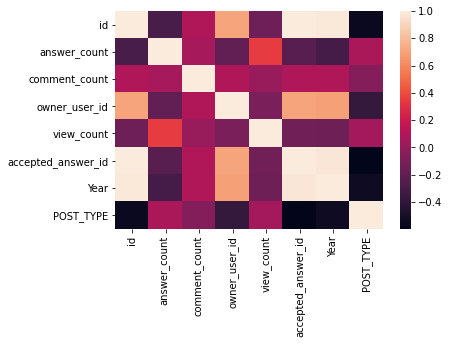

In [278]:
sns.heatmap(data.corr())

## Most correlated columns are 
##### 1. answer_count
##### 2. comment_count
##### 3. view_count
##### 4. Year

## Creating dependent and Independent Variables

In [279]:
X = data.iloc[:,[1,2,6,9]]
y = data.iloc[:,-1]

In [280]:
X

,answer_count,comment_count,view_count,Year
0,1,0,296,2011
1,2,2,4121,2010
2,0,2,259,2015
3,1,1,120,2013
4,5,1,97,2013
...,...,...,...,...
19995,0,1,28,2017
19996,0,0,80,2013
19997,0,0,18,2016
19998,3,3,164,2015


In [281]:
y

0        1
1        1
2        1
3        1
4        1
        ..
19995    1
19996    1
19997    1
19998    1
19999    0
Name: POST_TYPE, Length: 20000, dtype: int64

## Splitting data into training and testing 
#### 70% training and 30% testing

In [282]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [283]:
y_train

17218    1
15188    1
11295    0
19772    1
13072    0
        ..
11284    1
11964    1
5390     1
860      1
15795    0
Name: POST_TYPE, Length: 14000, dtype: int64

## Gaussian Naives Bayes

In [284]:
gnb = GaussianNB()

In [285]:
model = gnb.fit(X_train,y_train)

In [286]:
y_pred = model.predict(X_test)

In [287]:
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [288]:
print('Accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Accuracy 0.8521666666666666
              precision    recall  f1-score   support

           0       0.57      0.98      0.72      1161
           1       0.99      0.82      0.90      4839

    accuracy                           0.85      6000
   macro avg       0.78      0.90      0.81      6000
weighted avg       0.91      0.85      0.86      6000



## SGD Classifier

In [289]:
sgd = SGDClassifier()

In [290]:
model = sgd.fit(X_train,y_train)

In [291]:
y_pred = model.predict(X_test)

In [292]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [293]:
print('Accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Accuracy 0.8065
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1161
           1       0.81      1.00      0.89      4839

    accuracy                           0.81      6000
   macro avg       0.40      0.50      0.45      6000
weighted avg       0.65      0.81      0.72      6000



/Users/aviratbelekar/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression

In [294]:
logistic = LogisticRegression()

In [295]:
model = logistic.fit(X_train,y_train)

In [296]:
y_pred = model.predict(X_test)

In [297]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [298]:
print('Accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))

Accuracy 0.8068333333333333
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1161
           1       0.81      1.00      0.89      4839

    accuracy                           0.81      6000
   macro avg       0.90      0.50      0.45      6000
weighted avg       0.84      0.81      0.72      6000

